# Libraries

In [5]:
import numpy
# spicy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external widow.
%matplotlib inline

# Script

In [6]:
# Artificial Neural Network Class definition
class neuralNetwork:

    # initialise the neural network (with these parameters)
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):

        # set the number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # link weights matrices, Wih & Who
        # weights inside the arrays are w_i_j, where the link is from 
        # node i to node j in the next layer
        # W11 -> W21
        # W12 -> W22, etc.

        # weights from input to hidden layer
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        # weights from hidden to output layer
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        # set the learning rate
        self.lr = learningrate

        # Activation function / Sigmoid - using scipy.special (library/ module) 
        self.activation_function = lambda x: scipy.special.expit(x)

        pass

    # train the neural network
    def train(self, inputs_list, target_list):

        # Converts inputs lists into a 2D array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(target_list, ndmin=2).T

        # Calculate signals that I'll pass into the activation 
        # function in the hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Calculate the signal emergin from the hidden layer 
        hidden_outputs = self.activation_function(hidden_inputs)

        # Calculate signals that I'll pass into the activation 
        # function in the final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Calculate the signals emergin fron the output layer / The Final Output
        final_outputs = self.activation_function(final_inputs)

        # Calculate the error wich is (target - actual)
        output_errors = targets - final_outputs 

        # Hidden layer error
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # Update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors *  final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # Update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    # query the neural network 
    # give an answer from the output nodes after being given an input
    def query(self, inputs_list):

        # Convert input list into a 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T

        #  Calculate signals into hidden layer (input * weights)
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Calculate the signals emerging from the hidden layers
        hidden_outputs = self.activation_function(hidden_inputs)

        # Calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Calculate the signals emerging from the final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

# Training

In [7]:
# number of input, hidden and output nodes 
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate is 0.3
learning_rate = 0.2

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# load the MNIST training data CSV file into a list
training_data_file = open("mnist_dataset\mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the ANN with epocs 
EPOCS = 7

for e in range(EPOCS):
    # go through all records in the training data set
    for record in training_data_list:

        # split the record by the ',' commas
        all_values = record.split(",")

        # scale and shift the inputs
        # Dividing the raw inputs which are in the range 0-255 by 255 bring them into the
        # range 0-1. We then need to multiply by 0.99 too bring them into the range 0.0-0.99.
        # We then add 0.01 to shift them up the desire range 0.01 to 1.00.
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        # create the target output values (all 0.01, except the desired label wich is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

# Test

In [8]:
# load the MNIST dataset CSV file into a list 
test_data_file = open("mnist_dataset\mnist_test.csv", "r")
# .readlines() - Return all lines in the file, as a list where each line is an item in the list object
test_data_list = test_data_file.readlines()
test_data_file.close

# Test the ANN / without showing results 

# Scorecard for how well the network performs, initially empty 
scorecard = []

# Go through all the records in the test dataset
for record in test_data_list:

    all_values = record.split(",")

    correct_label = int(all_values[0])

    # Query the ANN 
    outputs = n.query(((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01))

    # The index of the highest value correspond to the label
    label = numpy.argmax(outputs)

    # append correct or incorrect to list
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9566


# Test with my| own images

In [9]:
import PIL
print("Pillow version:", PIL.__version__)

Pillow version: 9.3.0


**Path**

In [10]:
image_path = r"Fotos\reshaped_images\WIN_20221116_20_35_58_Pro.jpg"

In [11]:
# Load an image

# load and show an image with Pillow
from PIL import Image
# Open the image form working directory
image = Image.open(image_path).convert("L")
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

# this opens the .png file
# image.show()


None
(28, 28)
L


uint8
(28, 28, 3)


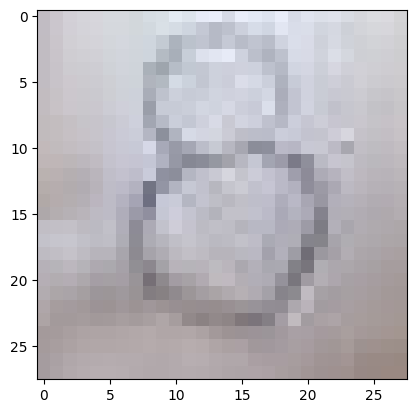

In [12]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread(image_path)
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

In [13]:
# 402 pixels wide, 402 pixels high, 3 denotes color chanels for RGB (red, green & blue) 

In [14]:
# Convert to NumPy Array 

from numpy import asfarray
# load the image
image = Image.open(image_path).convert("L")
# convert image to numpy array
data = asfarray(image)
print(type(data))
# summarize shape
print(data.shape)

<class 'numpy.ndarray'>
(28, 28)


In [15]:
img_data = 255.0 - data.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01 

In [16]:
inputs = img_data

# Query the ANN 
outputs = n.query(inputs)

# The index of the highest value correspond to the label
label = numpy.argmax(outputs)
print("El número ingresado es un:",label)

El número ingresado es un: 8


In [17]:
# NOTE
# label 1 - output 1 - good 
# label 2 - output 2 - good
# label 3 - output 9 - bad
# label 4 - output 4 - good 
# label 4 - output 9 - bad 
# label 5 - output 7 - bad 
# label 6 - output 4 - bad 
# label 7 - output 3 - bad 
# label 8 - output 5 - bad 
# label 9 - output 1 - bad
# label 7 - output 5 - bad

# Acuraccy
print(float(3 / 11))

0.2727272727272727


# Trying Test with a loop

In [18]:
# for reading images 
import PIL
# for plot
from matplotlib import image
from matplotlib import pyplot
# to convert arrays into float arrays
from numpy import asfarray

list of paths

In [19]:
paths = [r"Fotos\reshaped_images\20221116_165238000_iOS.jpg",
r"Fotos\reshaped_images\20221116_165251000_iOS.jpg",
r"Fotos\reshaped_images\20221116_165313000_iOS.jpg",
r"Fotos\reshaped_images\20221116_165326000_iOS.jpg",
r"Fotos\reshaped_images\20221116_165337000_iOS.jpg",
r"Fotos\reshaped_images\20221116_165359000_iOS.jpg",
r"Fotos\reshaped_images\20221116_165421000_iOS.jpg",
r"Fotos\reshaped_images\20221116_165437000_iOS.jpg",
r"Fotos\reshaped_images\20221116_165447000_iOS.jpg",
r"Fotos\reshaped_images\20221116_165459000_iOS.jpg",
r"Fotos\reshaped_images\20221116_165517000_iOS.jpg",]

In [20]:
labels = [1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 7]

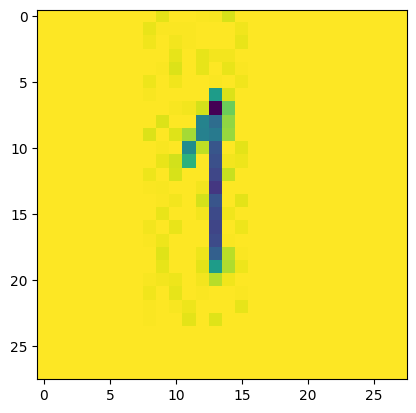

ANN prediction: 1 - Real number: 1


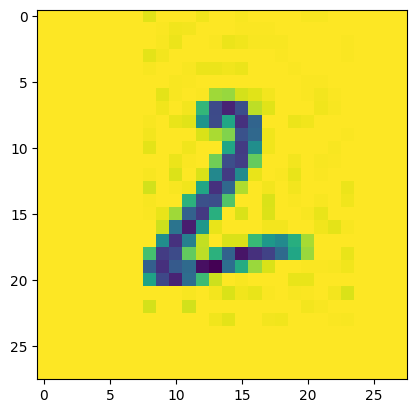

ANN prediction: 2 - Real number: 2


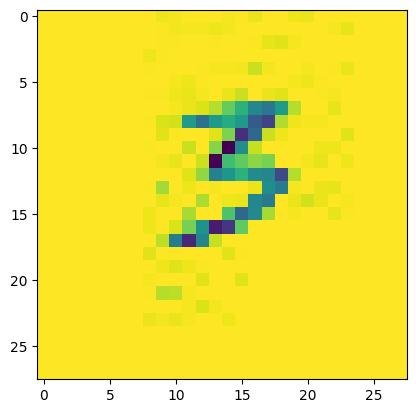

ANN prediction: 9 - Real number: 3


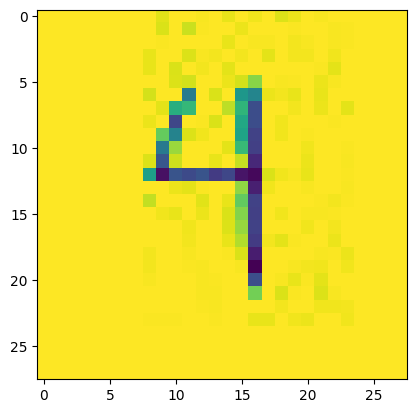

ANN prediction: 4 - Real number: 4


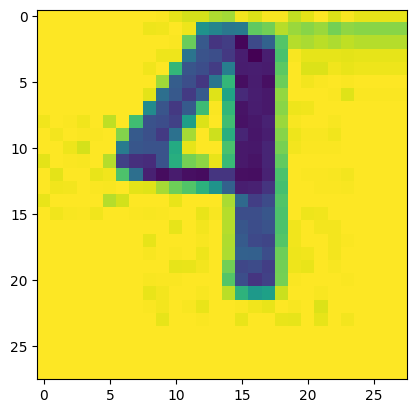

ANN prediction: 9 - Real number: 4


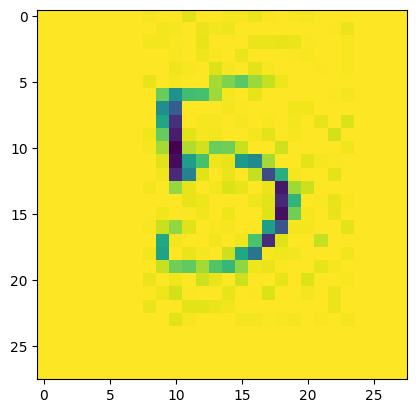

ANN prediction: 7 - Real number: 5


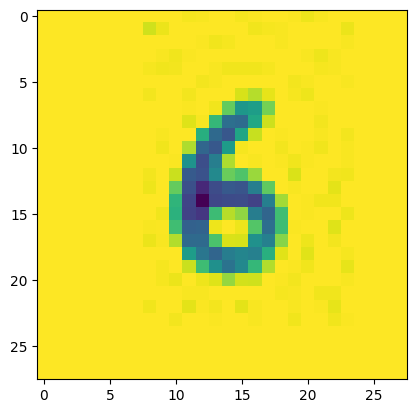

ANN prediction: 4 - Real number: 6


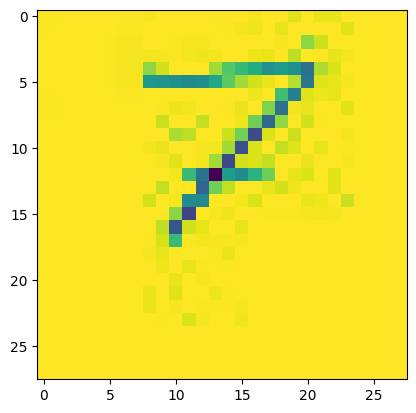

ANN prediction: 8 - Real number: 7


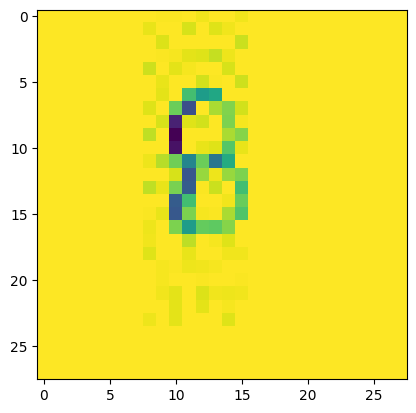

ANN prediction: 5 - Real number: 8


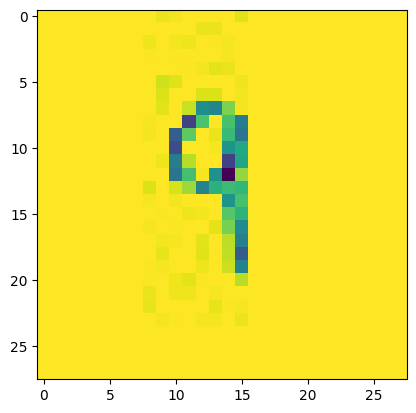

ANN prediction: 9 - Real number: 9


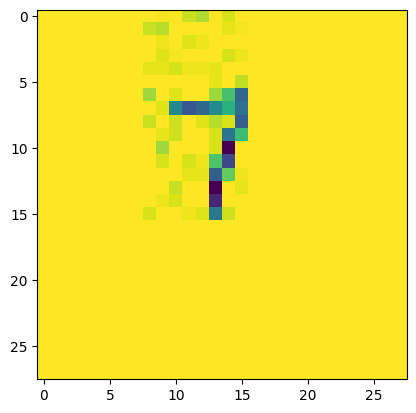

ANN prediction: 3 - Real number: 7


In [21]:
cont = 0
scorecard = []
for path in paths:
    
    # Open the image form working directory
    image = Image.open(path).convert("L")

    # display the array of pixels as an image
    pyplot.imshow(image)
    pyplot.show()

    # convert image to numpy array
    data = asfarray(image)

    # reshape and scale the inputs
    img_data = 255.0 - data.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01 

    inputs = img_data
    # Query the ANN 
    outputs = n.query(inputs)

    # The index of the highest value correspond to the label
    label = numpy.argmax(outputs)
    print("ANN prediction:",label, "- Real number:", labels[cont])

    if label == labels[cont]:
        scorecard.append(1)
    else:
        scorecard.append(0)

    cont += 1

In [22]:
print(scorecard)
# calculate performance
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

[1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]
performance =  0.36363636363636365


In [23]:
# Sacar una cita del INE a mi mamá el miercoles en la tarde, despues de las 5.